# Keras and transfer learning
## This notebook shows how to reuse a pretrained CNN
### More specifically, VGG16 is used, the last fully connected layers are used and then a new fully connected layer is added

### Note that this results on overfitting, still I think the code can help

In [1]:
from importlib import reload
from keras.models import Model
from keras.layers import Dense,Flatten
from keras.applications import vgg16
from keras import backend as K
import h5py
from keras.layers import Dense, GlobalAveragePooling2D

Using TensorFlow backend.


In [2]:
model = vgg16.VGG16(weights='imagenet', include_top=False)


58122240/58889256 [============================>.] - ETA: 0s

In [3]:
model.input

<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [5]:
x = model.output
x = GlobalAveragePooling2D()(x)

# add a fully-connected layer
x = Dense(512, activation='relu')(x)

# and a fully connected output/classification layer
predictions = Dense(10, activation='softmax')(x)

# create the full network so we can train on it
transfer_model = Model(input=model.input, output=predictions)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [6]:
# We do NOT want to retrain the convolutional layers from vgg16
for layer in model.layers:
    layer.trainable = False

In [7]:
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [8]:
from keras.datasets import cifar10
import keras
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = cifar10.load_data()

170229760/170498071 [============================>.] - ETA: 0s

In [9]:
# Normalize data
X_train = X_train_raw / 255 - 0.5
X_test = X_test_raw / 255 - 0.5

In [13]:
# Convert labels to one-hot-encoding
y_test = keras.utils.to_categorical(y_test_raw, 10)
y_train = keras.utils.to_categorical(y_train_raw, 10)

In [14]:
# Lets compile our model now
transfer_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
# And fit it...
transfer_history = transfer_model.fit(X_train, y_train,
                                      batch_size=64,
                                      epochs=10,
                                      verbose=1,
                                      validation_data=(X_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s - loss: 1.3200 - acc: 0.5384 - val_loss: 1.2776 - val_acc: 0.5537
Epoch 2/10
50000/50000 [==============================] - 24s - loss: 1.1315 - acc: 0.6037 - val_loss: 1.3172 - val_acc: 0.5352
Epoch 3/10
50000/50000 [==============================] - 24s - loss: 1.0575 - acc: 0.6302 - val_loss: 1.1696 - val_acc: 0.5935
Epoch 4/10
50000/50000 [==============================] - 26s - loss: 1.0016 - acc: 0.6489 - val_loss: 1.1309 - val_acc: 0.6080
Epoch 5/10
50000/50000 [==============================] - 34s - loss: 0.9536 - acc: 0.6678 - val_loss: 1.1177 - val_acc: 0.6170
Epoch 6/10
50000/50000 [==============================] - 34s - loss: 0.9098 - acc: 0.6832 - val_loss: 1.1238 - val_acc: 0.6097
Epoch 7/10
50000/50000 [==============================] - 34s - loss: 0.8707 - acc: 0.6956 - val_loss: 1.0932 - val_acc: 0.6305
Epoch 8/10
50000/50000 [==============================

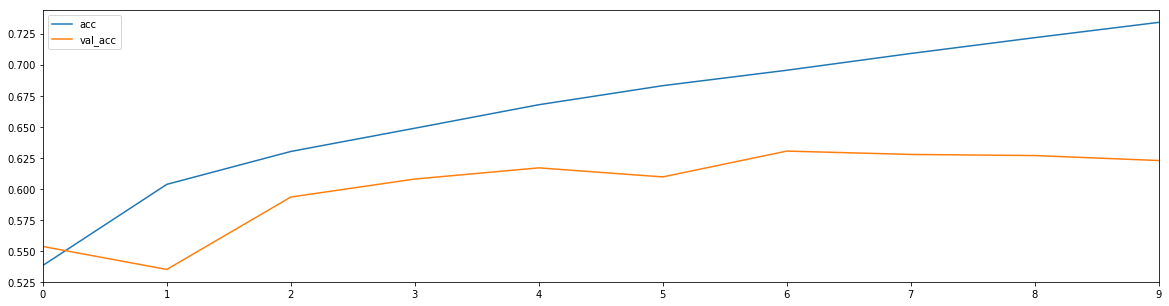

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
h = pd.DataFrame([transfer_history.history['acc'], transfer_history.history['val_acc']])
h = h.T
h.columns=['acc', 'val_acc']
h.plot(figsize=(20, 5))
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s - loss: 0.7278 - acc: 0.7456 - val_loss: 1.1748 - val_acc: 0.6208
Epoch 2/10
50000/50000 [==============================] - 24s - loss: 0.6972 - acc: 0.7581 - val_loss: 1.1786 - val_acc: 0.6243
Epoch 3/10
50000/50000 [==============================] - 24s - loss: 0.6634 - acc: 0.7689 - val_loss: 1.1981 - val_acc: 0.6320
Epoch 4/10
50000/50000 [==============================] - 24s - loss: 0.6321 - acc: 0.7785 - val_loss: 1.2867 - val_acc: 0.6112
Epoch 5/10
50000/50000 [==============================] - 24s - loss: 0.6014 - acc: 0.7915 - val_loss: 1.2399 - val_acc: 0.6257
Epoch 6/10
50000/50000 [==============================] - 24s - loss: 0.5727 - acc: 0.8004 - val_loss: 1.2445 - val_acc: 0.6337
Epoch 7/10
50000/50000 [==============================] - 24s - loss: 0.5457 - acc: 0.8124 - val_loss: 1.4147 - val_acc: 0.6071
Epoch 8/10
50000/50000 [==============================

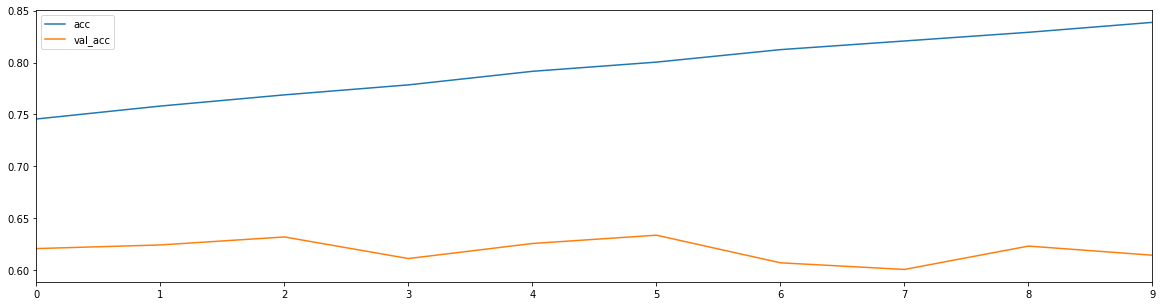

In [17]:
transfer_history = transfer_model.fit(X_train, y_train,
                                      batch_size=64,
                                      epochs=10,
                                      verbose=1,
                                      validation_data=(X_test, y_test))


h = pd.DataFrame([transfer_history.history['acc'], transfer_history.history['val_acc']])
h = h.T
h.columns=['acc', 'val_acc']
h.plot(figsize=(20, 5))
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s - loss: 0.4441 - acc: 0.8468 - val_loss: 1.4733 - val_acc: 0.6119
Epoch 2/10
50000/50000 [==============================] - 24s - loss: 0.4221 - acc: 0.8549 - val_loss: 1.4962 - val_acc: 0.6210
Epoch 3/10
50000/50000 [==============================] - 24s - loss: 0.4010 - acc: 0.8617 - val_loss: 1.5480 - val_acc: 0.6076
Epoch 4/10
50000/50000 [==============================] - 24s - loss: 0.3803 - acc: 0.8689 - val_loss: 1.5167 - val_acc: 0.6222
Epoch 5/10
50000/50000 [==============================] - 24s - loss: 0.3614 - acc: 0.8779 - val_loss: 1.5845 - val_acc: 0.6141
Epoch 6/10
50000/50000 [==============================] - 24s - loss: 0.3408 - acc: 0.8838 - val_loss: 1.6239 - val_acc: 0.6154
Epoch 7/10
50000/50000 [==============================] - 24s - loss: 0.3240 - acc: 0.8903 - val_loss: 1.7066 - val_acc: 0.6050
Epoch 8/10
50000/50000 [==============================

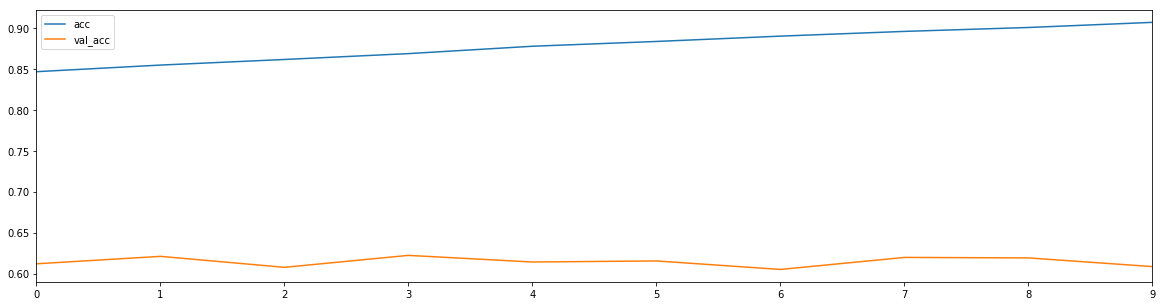

In [18]:
transfer_history = transfer_model.fit(X_train, y_train,
                                      batch_size=64,
                                      epochs=10,
                                      verbose=1,
                                      validation_data=(X_test, y_test))


h = pd.DataFrame([transfer_history.history['acc'], transfer_history.history['val_acc']])
h = h.T
h.columns=['acc', 'val_acc']
h.plot(figsize=(20, 5))
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s - loss: 0.2595 - acc: 0.9122 - val_loss: 1.7901 - val_acc: 0.6169
Epoch 2/10
50000/50000 [==============================] - 24s - loss: 0.2443 - acc: 0.9193 - val_loss: 1.8668 - val_acc: 0.6067
Epoch 3/10
50000/50000 [==============================] - 24s - loss: 0.2326 - acc: 0.9223 - val_loss: 1.9011 - val_acc: 0.6079
Epoch 4/10
50000/50000 [==============================] - 24s - loss: 0.2199 - acc: 0.9277 - val_loss: 1.9506 - val_acc: 0.6046
Epoch 5/10
50000/50000 [==============================] - 24s - loss: 0.2067 - acc: 0.9320 - val_loss: 1.9718 - val_acc: 0.6064
Epoch 6/10
50000/50000 [==============================] - 24s - loss: 0.1978 - acc: 0.9341 - val_loss: 2.0391 - val_acc: 0.6052
Epoch 7/10
50000/50000 [==============================] - 24s - loss: 0.1872 - acc: 0.9385 - val_loss: 2.0113 - val_acc: 0.6088
Epoch 8/10
50000/50000 [==============================

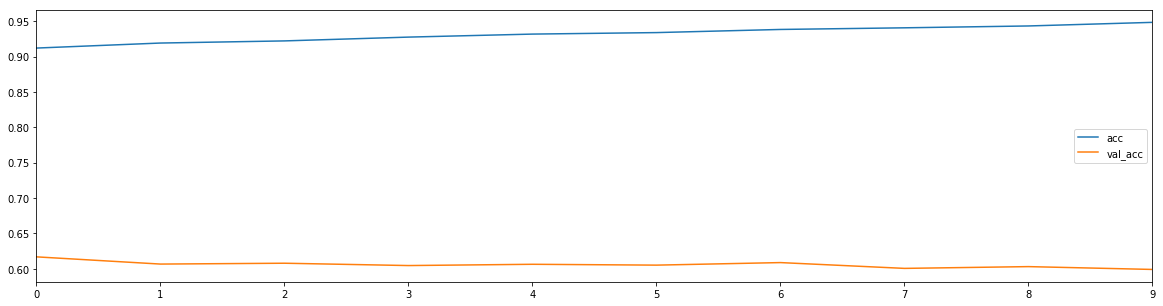

In [ ]:
transfer_history = transfer_model.fit(X_train, y_train,
                                      batch_size=64,
                                      epochs=10,
                                      verbose=1,
                                      validation_data=(X_test, y_test))


h = pd.DataFrame([transfer_history.history['acc'], transfer_history.history['val_acc']])
h = h.T
h.columns=['acc', 'val_acc']
h.plot(figsize=(20, 5))
plt.show()